In [1]:
import cv2
import config
import os
from src import util
from src import preprocessing
import matplotlib.pyplot as plt

In [5]:
pathTraining = config.pathTraining

In [8]:
pathImage = []

for root, dirs, files in os.walk(pathTraining):
    for file in files:
        if file.endswith(tuple(config.imageFormat)):
            pathImage.append(os.path.join(root, file))

In [12]:
label =[]
for i in pathImage:
    label.append(preprocessing.getLabel(i))

In [17]:
img = cv2.imread(pathImage[0])

In [20]:
img.shape

(570, 760, 3)

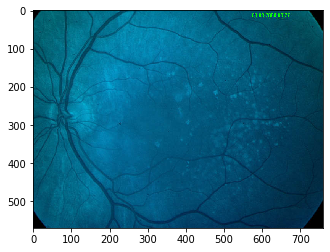

In [21]:
plt.imshow(img, )

In [26]:
img = cv2.imread(pathImage[44])

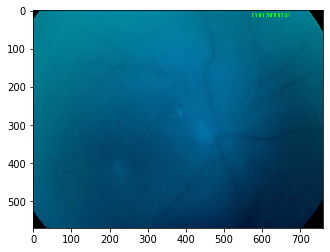

In [27]:
plt.imshow(img)

In [28]:
img.shape

(570, 760, 3)

In [36]:
cv2.resize(img, tuple([100, 100])).shape

(100, 100, 3)

In [34]:
config.modelParam['imageSize']

512

In [37]:
import numpy as np

In [39]:
np.zeros([2, 2])

array([[0., 0.],
       [0., 0.]])

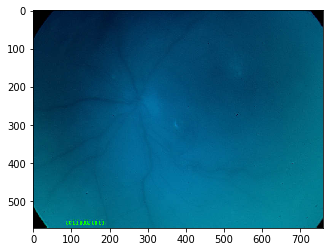

In [43]:
plt.imshow()

In [50]:
cv2.flip(img, -1).shape

ValueError: too many values to unpack (expected 2)

In [2]:
import logging
from src import dataGenerator
from src import util
import config


Using TensorFlow backend.


In [2]:
 params = util.Params(config.pathParam)

NameError: name 'util' is not defined

In [56]:
 # Training Data to Data Generator format
logging.info('Training Data to Data Generator format')
getTrainingData = dataGenerator.getData(pathImage=config.pathTraining)
trainingIndexes, trainingImageMap, trainingLabelMap = getTrainingData.getList()

logging.info('Creating Training Data Generator')
trainingGenerator = dataGenerator.DataGenerator(
    list_IDs=trainingIndexes, imageMap=trainingImageMap, labelMap=trainingLabelMap, params=params, prediction=False, shuffle=True)

# Validation Data to Data Generator format
getValidationData = dataGenerator.getData(pathImage=config.pathTesting)
validationIndexes, validationImageMap, validationLabelMap = getTrainingData.getList()

logging.info('Validation data to Data Generator format')
validationGenerator = dataGenerator.DataGenerator(
    list_IDs=validationIndexes, imageMap=validationImageMap, labelMap=validationLabelMap, params=params, prediction=False, shuffle=True)


NameError: name 'params' is not defined

In [2]:
import keras
from src import SWlayer
from src import util
from src import model


Using TensorFlow backend.


In [3]:
# Checking for param json folder and creating logging file
if not os.path.exists(config.pathParam):
    paramDict = config.modelParam
    util.save_json(paramDict, config.pathParam)

In [4]:
params = util.Params(config.pathParam)


In [5]:
swlayer = SWlayer.SWAP(output_dim=1, bias=True)

In [9]:
swlayer.build(input_shape=(None, 900, 1))

In [45]:
retinaModel, retinaHeatMap = model.retinaModel(params)

Patches Y: (None, 1)


In [10]:
retinaModel = keras.models.load_model('retinaModel.h5', custom_objects={'SWAP': swlayer})

TypeError: __init__() missing 1 required positional argument: 'output_dim'

In [12]:
model.get_weights()[8].shape

(1, 1, 512, 1)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 510, 510, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 256)     295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 256)       0   

In [15]:
l5 = model.get_layer('conv2d_5')

In [23]:
l5.get_weights()[0].shape

(1, 1, 512, 1)